# Preprocessing

## Analyse Dataset

In [1]:
using Pkg
Pkg.activate("/tf/Env")
deps = ["DataFrames", "CSV", "Plots", "ScikitLearn", "Statistics", "StatsPlots"]
Pkg.add(deps)

  Activating project at `/tf/Env`
   Resolving package versions...
  No Changes to `/tf/Env/Project.toml`
  No Changes to `/tf/Env/Manifest.toml`


In [25]:
using DataFrames, CSV, Plots, ScikitLearn, Statistics, StatsPlots

In [69]:
println(pwd())

/home/jovyan/notebooks/julia


In [111]:
df = DataFrame(CSV.File("../data/housing.csv"))
#df = first(df, 10)

Row,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,Float64,Float64,Float64,Float64,Float64?,Float64,Float64,Float64,Float64,String15
1,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
4,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
5,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
7,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
8,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY
9,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY


In [112]:
size(df)

(20640, 10)

In [113]:
rename!(df, "median_house_value" => "target")
first(df, 1)

Row,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target,ocean_proximity
,Float64,Float64,Float64,Float64,Float64?,Float64,Float64,Float64,Float64,String15
1,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


### Features

In [114]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,longitude,-119.57,-124.35,-118.49,-114.31,0,Float64
2,latitude,35.6319,32.54,34.26,41.95,0,Float64
3,housing_median_age,28.6395,1.0,29.0,52.0,0,Float64
4,total_rooms,2635.76,2.0,2127.0,39320.0,0,Float64
5,total_bedrooms,537.871,1.0,435.0,6445.0,207,"Union{Missing, Float64}"
6,population,1425.48,3.0,1166.0,35682.0,0,Float64
7,households,499.54,1.0,409.0,6082.0,0,Float64
8,median_income,3.87067,0.4999,3.5348,15.0001,0,Float64
9,target,2.06856e5,14999.0,179700.0,500001.0,0,Float64


In [115]:
mean_total_bedrooms = mean(skipmissing(df[:,"total_bedrooms"]))
df.total_bedrooms = replace(df.total_bedrooms, missing=>mean_total_bedrooms)
"Removed Missings"

"Removed Missings"

In [116]:
numerical_features = ["longitude",
                      "latitude",
                      "housing_median_age",
                      "total_rooms",
                      "total_bedrooms",
                      "population",
                      "households",
                      "median_income"]
categorical_features = ["ocean_proximity"]

1-element Vector{String}:
 "ocean_proximity"

### Correlation

In [117]:
feat_pairs = []
feats = size(numerical_features, 1)
for i in 1:feats
    for j in i+1:feats
        push!(feat_pairs, numerical_features[i]=>numerical_features[j])
    end
end

pair_corr(pair) = [ pair[1], pair[2], abs(cor( df[!,pair[1]], df[!,pair[2]] )) ]
feat_cor = map( pair_corr, feat_pairs)
sort!(feat_cor, lt=(x,y)->isless(x[3], y[3]), rev=true)
filter!((x)->x[3]>0.5, feat_cor)

tb = DataFrame(feat_1 = String[], feat_2 = String[], cor = Float64[])
for arr in feat_cor
    push!(tb, arr)
end
tb

Row,feat_1,feat_2,cor
,String,String,Float64
1,total_bedrooms,households,0.974725
2,total_rooms,total_bedrooms,0.927253
3,longitude,latitude,0.924664
4,total_rooms,households,0.918484
5,population,households,0.907222
6,total_bedrooms,population,0.87391
7,total_rooms,population,0.857126


In [118]:
# TODO: Scatter Plot on Map x: lat, y: long, z: target

## Feature Engineering

In [119]:
function make_coef!(df::DataFrame, quotient::String, dividend::String, divisor::String, chunk_size::Int = 1000)
    num_chunks = ceil(Int, nrow(df) / chunk_size)

    df[:, quotient] = df[:, dividend]
    
    for i in 1:num_chunks
        start_idx = (i - 1) * chunk_size + 1
        end_idx = min(i * chunk_size, nrow(df))
        
        df[start_idx:end_idx, quotient] = df[start_idx:end_idx, dividend] ./ df[start_idx:end_idx, divisor]
    end

    return df
end

make_coef! (generic function with 2 methods)

In [120]:
function make_cl!(df::DataFrame, feat::String, feat_1::String, feat_2::String, c1::Int = 1, c2::Int = 1, chunk_size::Int = 1000)
    num_chunks = ceil(Int, nrow(df) / chunk_size)

    df[:, feat] = df[:, feat_1]
    
    for i in 1:num_chunks
        start_idx = (i - 1) * chunk_size + 1
        end_idx = min(i * chunk_size, nrow(df))
        
        df[start_idx:end_idx, feat] = df[start_idx:end_idx, feat_1]*c1 + df[start_idx:end_idx, feat_2]*c2
    end

    return df
end

make_cl! (generic function with 4 methods)

### Ocean Proximity

In [121]:
custom_encoding = Dict( "ISLAND" => 0, "NEAR OCEAN" => 1, "NEAR BAY" => 2, "<1H OCEAN" => 3, "INLAND" => 4 )
df.ocean_proximity = replace(df.ocean_proximity, "ISLAND" => 0, "NEAR OCEAN" => 1, "NEAR BAY" => 2, "<1H OCEAN" => 3, "INLAND" => 4)
df[!,"ocean_proximity"] = convert.(Int,df[!,"ocean_proximity"])
mean(df.ocean_proximity)

2.948158914728682

### Rooms per bedroom

In [122]:
make_coef!(df, "rooms_per_bedroom", "total_rooms", "total_bedrooms")
mean(df.rooms_per_bedroom)

4.982617700193

### Rooms per household

In [123]:
make_coef!(df, "rooms_per_household", "total_rooms", "households")
mean(df.rooms_per_household)

5.428999742190376

### Population per bedrooms

In [124]:
make_coef!(df, "population_per_bedrooms", "population", "total_bedrooms")
mean(df.population_per_bedrooms)

2.9085613563275876

### Encoded position

In [125]:
make_cl!(df, "encoded_position", "longitude", "latitude")
mean(df.encoded_position)

-83.93784302325582

### Remove outliers

In [126]:
function remove_outliers( df::DataFrame, feat::String, q=0.05 )
    Qi = quantile(df[:,feat], q)
    Qf = quantile(df[:,feat], 1-q)
    IQR = Qf-Qi

    Qi -= 1.5*IQR
    Qf += 1.5*IQR
    
    return df[ (df[:,feat] .> Qi) .& (df[:,feat] .< Qf) , : ]
end

remove_outliers (generic function with 2 methods)

In [127]:
function remove_outliers_aux( feat )
    initial_rows = nrow(df)
    global df = remove_outliers(df, feat)
    diff = initial_rows - nrow(df)
    if(diff > 0)
        print(feat, " : ", diff, "\n")
    end
end
println("Initial size: ", size(df)[1], "\n---")
foreach(remove_outliers_aux, names(df))
println("---\nFinal size: ", size(df)[1])

Initial size: 20640
---
total_rooms : 107
total_bedrooms : 17
population : 18
households : 1
rooms_per_bedroom : 3
rooms_per_household : 122
population_per_bedrooms : 52
encoded_position : 3
---
Final size: 20317


### Visualization

In [128]:
gr()

Plots.GRBackend()

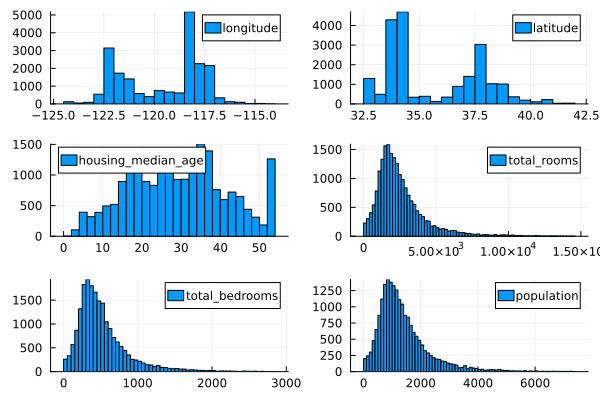

In [133]:
@df df histogram(cols(1:6); layout=(3,2))

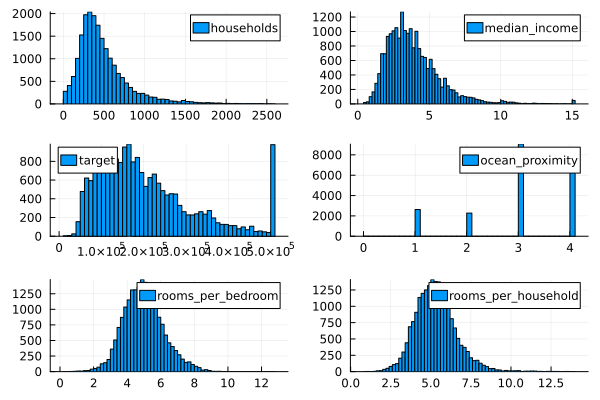

In [134]:
@df df histogram(cols(7:12); layout=(3,2))

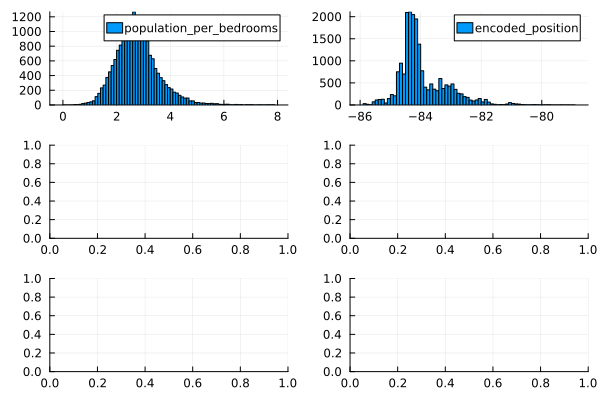

In [136]:
@df df histogram(cols(13:14); layout=(3,2))